In [2]:
import pandas as pd
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
from keras.layers.advanced_activations import PReLU
from keras.wrappers.scikit_learn import KerasRegressor

In [4]:
pml_example_submission = pd.read_csv('pml_example_submission.csv', sep = ',')
pml_test_features = pd.read_csv('pml_test_features.csv', sep = ',')
pml_train = pd.read_csv('pml_train.csv', sep = ',')

#### 1. Exploratory Analysis

In [5]:
#store the target variable to "loss"
data, loss = pml_train.ix[:, :-1], pml_train.ix[:, -1]

In [6]:
#Transform categorical variables to numerical
np.random.seed(123)
label_encoder = preprocessing.LabelEncoder()
for i in range(1,117):
    data.ix[:,i] = label_encoder.fit_transform(data.ix[:,i])

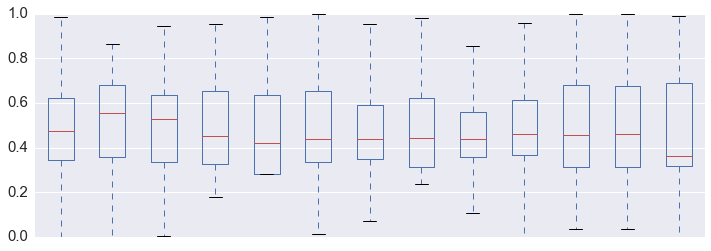

In [33]:
#Box plot of the continuous variables
data.ix[:,-14:-1].plot.box(figsize=(12,4), xticks=[])
pass

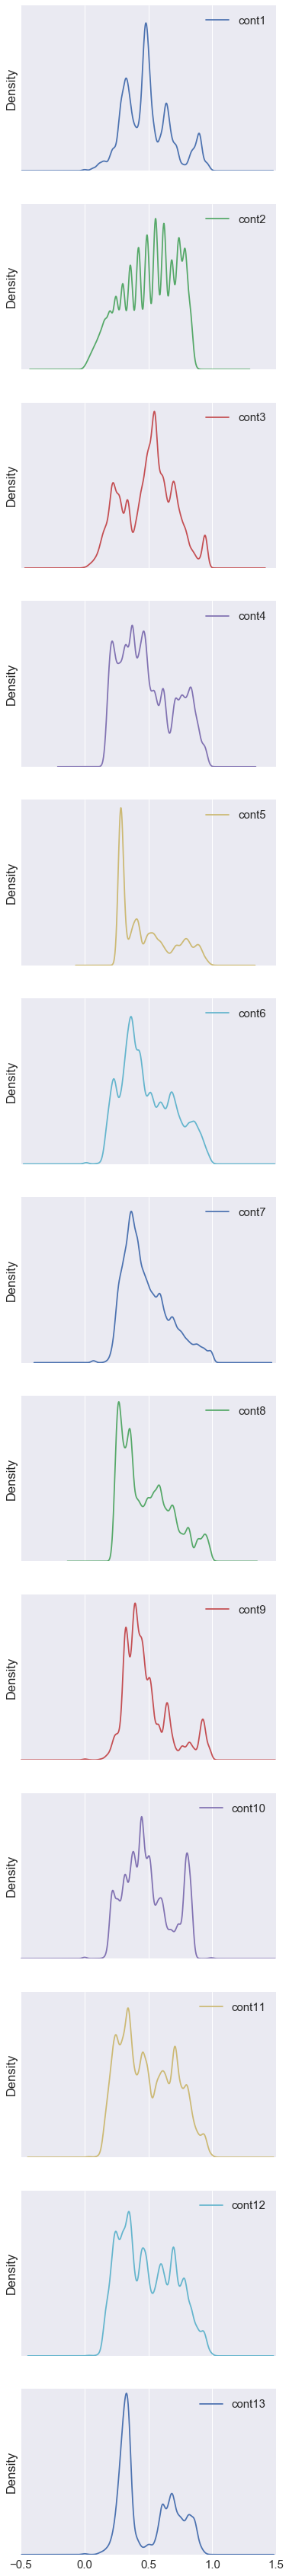

In [34]:
#Density plot of the continuous variables
data.ix[:,-14:-1].plot.density(figsize=(6, 60), subplots=True, yticks=[])
pass

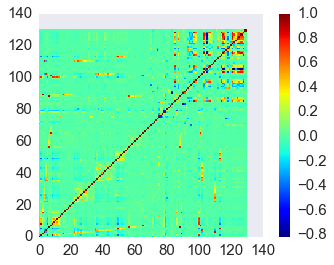

In [10]:
#Correlation plot of all the variables
heatmap = plt.pcolor(data.ix[:,1:].corr(), cmap='jet')
plt.colorbar(heatmap)
plt.gca().set_aspect('equal')

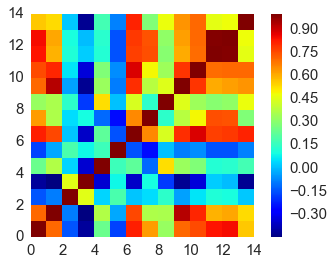

In [13]:
#Correlation plot of all the continuous variables (Top right corner of the previous graph)
heatmap = plt.pcolor(data.ix[:,-15:-1].corr(), cmap='jet')
plt.colorbar(heatmap)
plt.gca().set_aspect('equal')

In [8]:
#Scale the data
data_scaled = DataFrame(StandardScaler().fit_transform(data.ix[:,1:]), columns=data.ix[:,1:].columns)
data_scaled.head(10)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,-0.574436,-0.875693,-0.240963,-0.681466,1.381206,-0.654966,-0.157428,-0.250047,-0.816525,-0.419393,...,0.434548,0.874233,0.171934,0.341392,0.289982,-0.137154,-0.006243,-0.056590,1.240723,-0.680046
1,1.740837,-0.875693,-0.240963,-0.681466,-0.724005,1.526797,-0.157428,-0.250047,-0.816525,-0.419393,...,-0.984678,-0.027890,1.191833,-0.656860,-0.432880,-0.490427,-0.117691,-0.165583,-0.885405,-0.113837
2,-0.574436,-0.875693,-0.240963,1.467424,-0.724005,-0.654966,-0.157428,-0.250047,-0.816525,-0.419393,...,0.063010,-0.680533,-0.679232,0.488610,-0.229253,-0.547897,-0.723694,-0.673171,-0.721308,-0.952167
3,1.740837,-0.875693,-0.240963,-0.681466,-0.724005,1.526797,-0.157428,-0.250047,-0.816525,-0.419393,...,-0.984678,1.257057,0.299208,0.311677,0.105147,0.072149,1.042080,0.982149,1.020278,1.260224
4,-0.574436,1.141953,-0.240963,-0.681466,-0.724005,-0.654966,-0.157428,-0.250047,1.224702,-0.419393,...,0.021400,-0.826347,-0.888080,-0.870334,-0.488485,-0.633158,-1.183604,-1.201461,-1.088564,-0.690925
5,-0.574436,-0.875693,-0.240963,-0.681466,-0.724005,1.526797,-0.157428,-0.250047,-0.816525,-0.419393,...,-0.308476,-0.842553,-0.686890,-1.092842,-0.388021,-0.315218,-0.886780,-0.913631,-0.831756,-0.905298
6,1.740837,1.141953,-0.240963,-0.681466,-0.724005,-0.654966,-0.157428,-0.250047,1.224702,-0.419393,...,-0.586125,-0.299445,1.885153,-0.137356,0.024137,-0.519243,0.198153,0.143880,-0.885405,-0.953174
7,-0.574436,-0.875693,-0.240963,1.467424,-0.724005,-0.654966,-0.157428,3.999243,-0.816525,-0.419393,...,-0.103174,-1.190716,-1.330394,-1.020915,-0.892818,-1.433961,-1.113331,-1.133307,-0.790814,-0.105372
8,-0.574436,-0.875693,-0.240963,-0.681466,1.381206,-0.654966,-0.157428,-0.250047,-0.816525,-0.419393,...,0.021400,-0.743993,0.188480,-0.629253,-1.440158,-0.047530,0.142526,0.089243,-1.672169,-1.083086
9,1.740837,-0.875693,-0.240963,-0.681466,1.381206,-0.654966,-0.157428,-0.250047,-0.816525,-0.419393,...,-0.308476,-1.317836,-1.017267,-1.045158,-0.565582,-1.010884,-1.183604,-1.201461,-0.911816,-0.864821


Conduct PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA()
data_scaled_pca = DataFrame(pca.fit_transform(data_scaled))

In [10]:
#Get the cumulative explained variance ratio
v = pca.explained_variance_ratio_
vc = v.cumsum()

In [11]:
#Pick those with cumulative explained variance ratio over 80%
n_comps = 1 + np.argmax(vc > 0.8) 
n_comps

60

In [12]:
#Pick the principle components
data_scaled_pca = data_scaled_pca.ix[:, 1:n_comps]
data_scaled_pca.shape

(131822, 60)

#### 2 Models
#### 3 Training
#### 4 Hyperparameter Selection
#### 5 Data Splits

In [14]:
# Split into train and test sets
X_train_pc, X_test_pc, y_train_pc, y_test_pc = \
  train_test_split(data_scaled_pca, loss, test_size=0.33, random_state=42)

In [15]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = \
  train_test_split(data_scaled, loss, test_size=0.33, random_state=42)

In [16]:
X_train, X_test, y_train, y_test = \
  train_test_split(data.ix[:,1:], loss, test_size=0.33, random_state=42)

Linear Regression (Baseline Model)

In [17]:
from sklearn.linear_model import LinearRegression
# Initialize the model class.
model = LinearRegression()
# Fit the model to the training data.
model.fit(X_train, y_train)
# Generate our predictions for the test set.
predictions = model.predict(X_test)
# Compute error between our test predictions and the actual values.
mean_absolute_error(predictions, y_test)

1336.4525302990494

In [18]:
#Try on Principle Component regression
model.fit(X_train_pc, y_train_pc)
predictions_pc = model.predict(X_test_pc)
mean_absolute_error(predictions_pc, y_test)

1363.9549670492449

Ridge Regression with 6 hyperparameters

In [102]:
from sklearn.linear_model import Ridge
alpha_ridge = [1e-7,1e-2, 1, 5, 10, 20]
for i in range(6):
    ridgereg = Ridge(alpha=alpha_ridge[i],normalize=True)
    ridgereg.fit(X_train,y_train)
    predictions = ridgereg.predict(X_test)
    print(mean_absolute_error(predictions, y_test))

1336.45228243
1334.91979909
1365.32963806
1562.27302763
1683.09304301
1789.88330235


Random Forest

In [105]:
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 2}
rf_model1 = RandomForestRegressor(**params)  
rf_model1.fit(X = X_train ,  y = y_train)
rf_predictions1 = rf_model1.predict(X_test)
print(mean_absolute_error(y_test, rf_predictions1))
# print("OOB accuracy: ")
# print(rf_model.oob_score_)
print("--- %s seconds ---" % (time.time() - start_time))

1306.81986675
--- 444.14832305908203 seconds ---


In [106]:
start_time = time.time()
params = {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 2}
rf_model2 = RandomForestRegressor(**params)  
rf_model2.fit(X = X_train ,  y = y_train)
rf_predictions2 = rf_model2.predict(X_test)
print(mean_absolute_error(y_test, rf_predictions2))
# print("OOB accuracy: ")
# print(rf_model.oob_score_)
print("--- %s seconds ---" % (time.time() - start_time))

1259.6701512
--- 1176.3717801570892 seconds ---


In [107]:
start_time = time.time()
params = {'n_estimators': 500, 'max_depth': 50, 'min_samples_split': 2}
rf_model3 = RandomForestRegressor(**params)  
rf_model3.fit(X = X_train ,  y = y_train)
rf_predictions3 = rf_model3.predict(X_test)
print(mean_absolute_error(y_test, rf_predictions3))
# print("OOB accuracy: ")
# print(rf_model.oob_score_)
print("--- %s seconds ---" % (time.time() - start_time))

1258.02643895
--- 1979.8514709472656 seconds ---


In [108]:
start_time = time.time()
params = {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 2}
rf_model4 = RandomForestRegressor(**params)  
rf_model4.fit(X = X_train ,  y = y_train)
rf_predictions4 = rf_model4.predict(X_test)
print(mean_absolute_error(y_test, rf_predictions4))
# print("OOB accuracy: ")
# print(rf_model.oob_score_)
print("--- %s seconds ---" % (time.time() - start_time))

1257.76338724
--- 2785.47393989563 seconds ---


In [109]:
start_time = time.time()
params = {'n_estimators': 1000, 'max_depth': 50, 'min_samples_split': 2}
rf_model5 = RandomForestRegressor(**params)  
rf_model5.fit(X = X_train ,  y = y_train)
rf_predictions5 = rf_model5.predict(X_test)
print(mean_absolute_error(y_test, rf_predictions5))
# print("OOB accuracy: ")
# print(rf_model.oob_score_)
print("--- %s seconds ---" % (time.time() - start_time))

1258.22464009
--- 4028.0248260498047 seconds ---


In [61]:
#The top 20 features
sorted(zip(rf_model4.feature_importances_, X_train.columns), key=lambda x: -x[0])[:20]

[(0.22650257745084235, 'cat80'),
 (0.10518972935805672, 'cont7'),
 (0.052579525370638362, 'cat57'),
 (0.045198070624659491, 'cont2'),
 (0.039310413707315368, 'cont14'),
 (0.03826421335568822, 'cat79'),
 (0.025616866252263587, 'cat12'),
 (0.022083141546236255, 'cat101'),
 (0.019038160053481325, 'cat81'),
 (0.017097463937983396, 'cont8'),
 (0.016472526987514436, 'cont3'),
 (0.016393838435648778, 'cat112'),
 (0.016053379444843443, 'cat100'),
 (0.015457549287409214, 'cont12'),
 (0.015358720237642585, 'cont1'),
 (0.014969670717810944, 'cont5'),
 (0.014378737624914444, 'cont11'),
 (0.01428304602923549, 'cont6'),
 (0.013901605240016135, 'cont4'),
 (0.012806271398941664, 'cont13')]

In [150]:
start_time = time.time()

from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': 700, 'max_depth': 50, 'min_samples_split': 2}
rfm = RandomForestRegressor(**params)  
var_idx = rf_model4.feature_importances_.argsort()[-20:]
rfm.fit(X = X_train[var_idx] ,  y = y_train)
rf_predictions_rfm = rfm.predict(X_test[var_idx])
print(mean_absolute_error(y_test, rf_predictions_rfm))
print("--- %s seconds ---" % (time.time() - start_time))

1377.0601899
--- 1091.7604010105133 seconds ---


([<matplotlib.axis.XTick at 0x67faa29e8>,
 <a list of 6 Text xticklabel objects>)

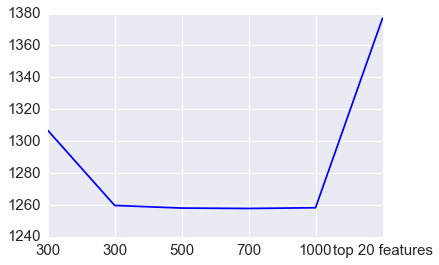

In [151]:
y = [mean_absolute_error(rf_predictions1, y_test),
     mean_absolute_error(rf_predictions2, y_test),
     mean_absolute_error(rf_predictions3, y_test),
     mean_absolute_error(rf_predictions4, y_test),
     mean_absolute_error(rf_predictions5, y_test),
     mean_absolute_error(rf_predictions_rfm, y_test)]
x = range(len(y))
LABELS = ['300','300','500', '700', '1000', 'top 20 features']

plt.plot(x, y, color="blue")
plt.xticks(x, LABELS)

Neural Networks

In [147]:
#3 layers
def base_model1():
    nn_model = Sequential()  
    nn_model.add(Dense(400, input_dim=130, init='he_normal', activation='relu'))
    nn_model.add(Dense(50, init='he_normal', activation='relu')) 
    nn_model.add(Dense(1, init='he_normal'))
    nn_model.compile(loss="mae", optimizer='adadelta', metrics=['accuracy']) 
    return nn_model
#3 layers, more neurons
def base_model2():
    nn_model = Sequential()  
    nn_model.add(Dense(50, input_dim=130, init='he_normal', activation='relu'))
    nn_model.add(Dense(30, init='he_normal', activation='relu')) 
    nn_model.add(Dense(1, init='he_normal'))
    nn_model.compile(loss="mae", optimizer='adadelta', metrics=['accuracy']) 
    return nn_model
#5 layers
def base_model3():
    nn_model = Sequential()  
    nn_model.add(Dense(400, input_dim=130, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dense(200, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(70, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(50, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.2))
    nn_model.add(Dense(1, init='he_normal'))
    nn_model.compile(loss="mae", optimizer='adadelta', metrics=['accuracy']) 
    return nn_model
#7 layers
def base_model4():
    nn_model = Sequential()  
    nn_model.add(Dense(400, input_dim=130, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(200, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(100, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(70, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(50, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.2))
    nn_model.add(Dense(15, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.2))
    nn_model.add(Dense(1, init='he_normal'))
    nn_model.compile(loss="mae", optimizer='adadelta', metrics=['accuracy']) 
    return nn_model

#9 layers
def base_model5():
    nn_model = Sequential()  
    nn_model.add(Dense(400, input_dim=130, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(300, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(200, init='he_normal'))
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(100, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(70, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(50, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.4))
    nn_model.add(Dense(25, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.2))
    nn_model.add(Dense(15, init='he_normal')) 
    nn_model.add(PReLU())
    nn_model.add(Dropout(0.2))
    nn_model.add(Dense(1, init='he_normal'))
    nn_model.compile(loss="mae", optimizer='adadelta', metrics=['accuracy']) 
    return nn_model

In [110]:
# base_model1
np.random.seed(123)
start_time = time.time()
# evaluate model
nn_estimator1 = KerasRegressor(build_fn=base_model1, nb_epoch=15, batch_size=33, verbose=0)
nn_estimator1.fit(np.array(X_train_scaled),np.array(y_train))
nn_predictions1 = nn_estimator1.predict(np.array(X_test_scaled))
print(mean_absolute_error(nn_predictions1, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

1197.81184538
--- 97.84829592704773 seconds ---


In [111]:
# base_model2
np.random.seed(123)
start_time = time.time()
# evaluate model
nn_estimator2 = KerasRegressor(build_fn=base_model2, nb_epoch=15, batch_size=33, verbose=0)
nn_estimator2.fit(np.array(X_train_scaled),np.array(y_train))
nn_predictions2 = nn_estimator2.predict(np.array(X_test_scaled))
print(mean_absolute_error(nn_predictions2, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

1214.22942562
--- 32.45439791679382 seconds ---


In [112]:
# base_model3
np.random.seed(123)
start_time = time.time()
# evaluate model
nn_estimator3 = KerasRegressor(build_fn=base_model3, nb_epoch=15, batch_size=33, verbose=0)
nn_estimator3.fit(np.array(X_train_scaled),np.array(y_train))
nn_predictions3 = nn_estimator3.predict(np.array(X_test_scaled))
print(mean_absolute_error(nn_predictions3, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

1189.3229291
--- 239.7537989616394 seconds ---


In [116]:
# base_model4
np.random.seed(123)
start_time = time.time()
# evaluate model
nn_estimator4 = KerasRegressor(build_fn=base_model4, nb_epoch=15, batch_size=30, verbose=0)
nn_estimator4.fit(np.array(X_train_scaled),np.array(y_train))
nn_predictions4 = nn_estimator4.predict(np.array(X_test_scaled))
print(mean_absolute_error(nn_predictions4, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

1259.61819061
--- 339.99370312690735 seconds ---


In [145]:
# base_model5
np.random.seed(123)
start_time = time.time()
# evaluate model
nn_estimator5 = KerasRegressor(build_fn=base_model5, nb_epoch=15, batch_size=30, verbose=0)
nn_estimator5.fit(np.array(X_train_scaled),np.array(y_train))
nn_predictions5 = nn_estimator5.predict(np.array(X_test_scaled))
print(mean_absolute_error(nn_predictions5, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

2173.22319008
--- 416.2498002052307 seconds ---


([<matplotlib.axis.XTick at 0x67ecfdac8>,
 <a list of 5 Text xticklabel objects>)

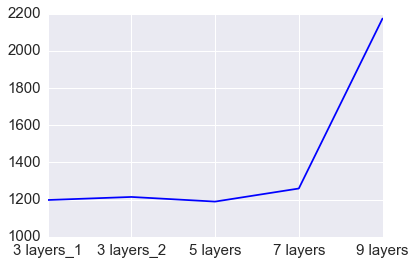

In [146]:
y = [mean_absolute_error(nn_predictions1, y_test),
     mean_absolute_error(nn_predictions2, y_test),
     mean_absolute_error(nn_predictions3, y_test),
     mean_absolute_error(nn_predictions4, y_test),
     mean_absolute_error(nn_predictions5, y_test)]
x = range(5)
LABELS = ['3 layers_1','3 layers_2','5 layers', '7 layers', '9 layers']

plt.plot(x, y, color="blue")
plt.xticks(x, LABELS)


Predictive Accuracy

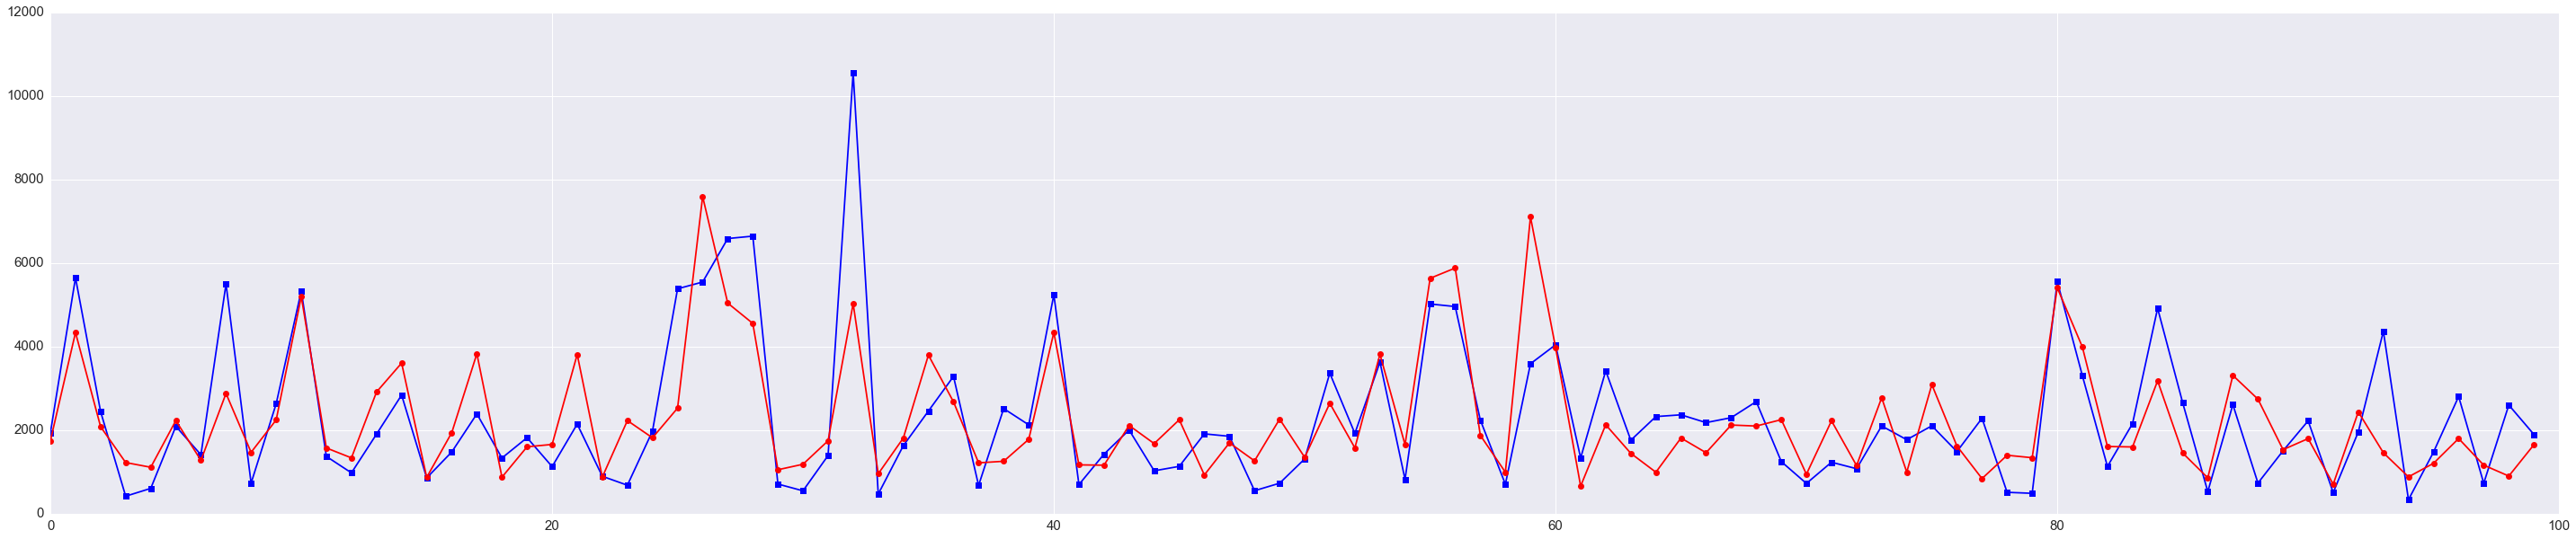

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
# First 100 predictions 
x =range(len(y_test[:101]))
plt.plot(x,y_test[:101], c='b', marker="s")
plt.plot(x,nn_predictions_3[:101], c='r', marker="o")
plt.show()

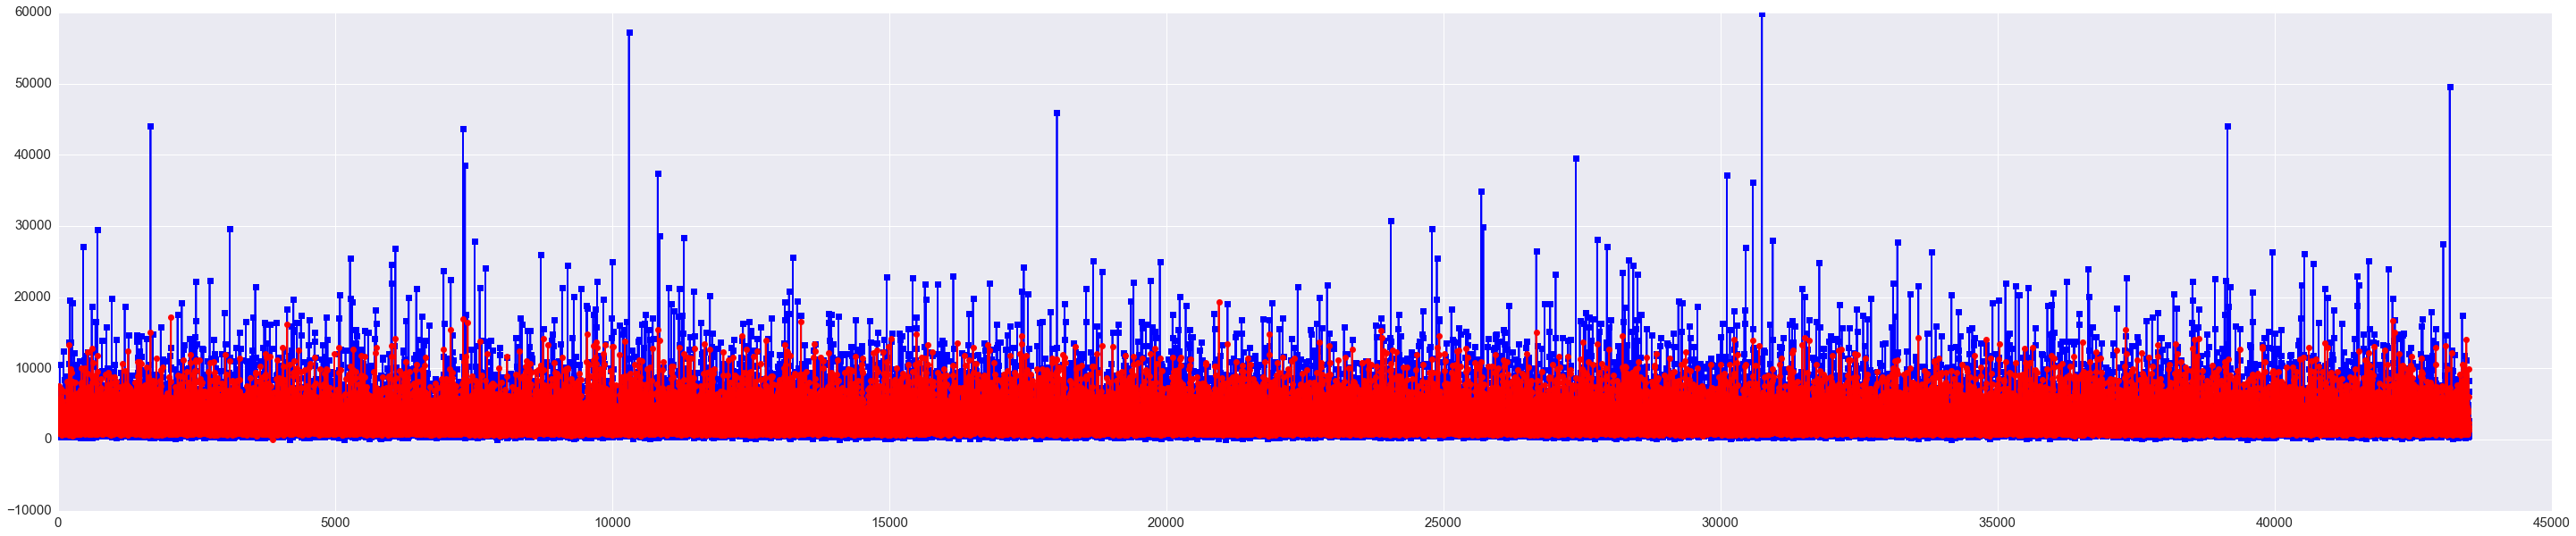

In [182]:
# all predictions 
plt.figure(figsize=(50,10))
x =range(len(y_test))
plt.plot(x,y_test, c='b', marker="s")
plt.plot(x,nn_predictions_3, c='r', marker="o")
plt.show()

Output submission file

In [27]:
#same data preprocessing on pml_test_features
np.random.seed(123)
label_encoder = preprocessing.LabelEncoder()
for i in range(1,117):
    pml_test_features.ix[:,i] = label_encoder.fit_transform(pml_test_features.ix[:,i])

pml_test_features_scaled = DataFrame(StandardScaler().fit_transform(pml_test_features.ix[:,1:]), columns=pml_test_features.ix[:,1:].columns)
pml_test_features_scaled.head(10)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1.737134,-0.871402,-0.240579,1.455353,-0.718798,1.520908,-0.158587,-0.248546,-0.812486,-0.417532,...,0.008897,-0.361438,-0.772029,0.483416,0.109226,-0.580600,-0.772076,-0.638527,-0.851536,0.729658
1,-0.575661,-0.871402,-0.240579,1.455353,-0.718798,-0.657502,-0.158587,-0.248546,-0.812486,-0.417532,...,-0.518132,1.707849,0.102381,2.288586,2.456704,1.804031,1.616299,1.619002,1.493362,-0.519435
2,-0.575661,1.147575,-0.240579,-0.687118,1.391211,-0.657502,-0.158587,-0.248546,1.230791,-0.417532,...,1.456589,1.540112,-0.035039,1.181718,2.514632,1.804031,2.093380,2.067071,1.660332,1.406645
3,-0.575661,-0.871402,-0.240579,-0.687118,-0.718798,1.520908,-0.158587,-0.248546,-0.812486,-0.417532,...,1.997295,-1.224113,-1.129818,-1.208633,-0.976359,-0.935917,-1.287854,-1.302544,-0.755767,-1.277959
4,1.737134,1.147575,4.156631,-0.687118,-0.718798,-0.657502,-0.158587,-0.248546,1.230791,2.395024,...,0.883266,-0.846735,-0.686828,-1.094311,-0.393676,-0.320309,-0.885088,-0.911905,-0.838053,-0.898454
5,-0.575661,-0.871402,-0.240579,-0.687118,-0.718798,1.520908,-0.158587,-0.248546,-0.812486,-0.417532,...,-0.992069,0.912598,1.702978,-0.519895,-0.393676,0.477948,1.070277,1.055756,0.549522,1.253986
6,1.737134,-0.871402,-0.240579,-0.687118,-0.718798,1.520908,-0.158587,-0.248546,-0.812486,-0.417532,...,1.907119,-0.575773,-0.722635,-0.631814,-0.235486,-0.261393,-0.962984,-0.942410,-0.727835,-0.521731
7,-0.575661,-0.871402,-0.240579,-0.687118,-0.718798,1.520908,-0.158587,-0.248546,-0.812486,-0.417532,...,-0.992069,-0.468958,0.596701,-1.140831,-0.348761,-0.692958,0.308159,0.252274,-0.917946,-1.232837
8,-0.575661,-0.871402,-0.240579,-0.687118,1.391211,-0.657502,-0.158587,-0.248546,-0.812486,-0.417532,...,0.050295,-0.772742,-0.603327,0.483416,-0.235486,-0.552108,-0.722320,-0.671898,-0.727835,-1.258302
9,-0.575661,-0.871402,4.156631,-0.687118,-0.718798,-0.657502,-0.158587,-0.248546,-0.812486,-0.417532,...,-0.992069,-0.085006,1.501036,-0.462960,-0.166961,-0.142918,-0.246419,-0.291120,-0.824500,-0.619774


In [28]:
pml_submission = pml_example_submission.copy()
#Make prediction from the best model
nn_predictions_final = nn_estimator3.predict(np.array(pml_test_features_scaled))

In [30]:
# Create submission file
pml_submission.loss = nn_predictions_final
pml_submission.head()

,id,loss
0,131822,1297.544556
1,131823,1654.102295
2,131824,3400.237305
3,131825,1063.073730
4,131826,3276.271973


In [31]:
# Store the file
pml_submission.to_csv('pml_submission.csv', index=False)